# Assignment 2

#### Full Marks for each question :

 1. 2
 2. 6
 3. 3
 4. 4
 5. 10
 6. 5
 7. 5
 8. 5
 9. 5
 10. 5

### Linear Regression Assignment

#### Dataset : Diabaetes data from python sklearn package

##### Description

The diabetes dataset consists of 10 baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

<br> Dependent Variable is **target**

**Note** : *All the variables in the dataset are already standardised in the range (-1,1). The categorical variable is also standardised ('sex'). We will ignore this variable from our analysis.* 

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dt = datasets.load_diabetes()
data = pd.DataFrame(data= np.c_[dt['data'], dt['target']],columns= dt['feature_names'] + ['target'] )
data = data.drop(columns = ['sex'])

In [2]:
data.to_csv('diabetes_data.csv')

In [3]:
data.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### Q1 : Check No. of missing values in each of the variables and descriptive statistics

In [4]:
# Missing value check

print(data.isna().sum())

# descriptive stats

print(data.describe())


age       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
                age           bmi            bp            s1            s2  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16 -8.045349e-16  1.281655e-16 -8.835316e-17  1.327024e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -9.027530e-02 -1.123996e-01 -1.267807e-01 -1.156131e-01   
25%   -3.729927e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02 -3.035840e-02   
50%    5.383060e-03 -7.283766e-03 -5.670611e-03 -4.320866e-03 -3.819065e-03   
75%    3.807591e-02  3.124802e-02  3.564384e-02  2.835801e-02  2.984439e-02   
max    1.107267e-01  1.705552e-01  1.320442e-01  1.539137e-01  1.987880e-01   

                 s3            s4            s5            s6      target  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  
mea

#### Q2a : Check the count of outliers in each of the independent variables using mean +- sigma method
#### Q2b : Replace the lower outliers by the lower limit (mean - 2sigma) and upper outliers by upper limit (mean + 2sigma)
#### Q2c : Plot scatter plot of the variable with high number of outliers (both original and imputed)

##### You can refer the functions used in the course materials

In [5]:
# mean +- 2sigma
# function to calculate outlier of a variable
def out1(x):
    mu = np.average(x)
    sigma = np.std(x)
    LL = mu - 2*sigma # Lower limit 
    UL = mu + 2*sigma # Upper limit
    count=((x<LL)|(x>UL))
    return count

# check #outliers in each variable
print(data.apply(out1).apply(sum))

# Function to Replace outlier with LL / UL

def out_impute(x):
    mu = np.average(x)
    sigma = np.std(x)
    LL = mu - 2*sigma # Lower limit 
    UL = mu + 2*sigma # Upper limit
    x = np.where((x<LL),LL,x)
    x = np.where((x>UL),UL,x)
    return(x)

data1 = data.apply(out_impute) # Create new data with inputed values
data1


age       16
bmi       15
bp        19
s1        20
s2        20
s3        18
s4        19
s5        20
s6        21
target    11
dtype: int64


,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


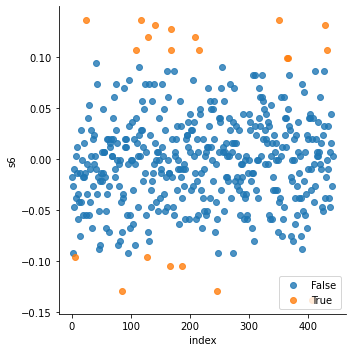

In [6]:
# library
import seaborn as sns

# Create a new data for the plot
temp_data = pd.concat([data.s6, pd.DataFrame(out1(data.s6))],axis=1)
temp_data.columns = ['s6', 'out']
temp_data['index'] = temp_data.index

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='index', y='s6', data=temp_data, fit_reg=False, hue='out', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right') 



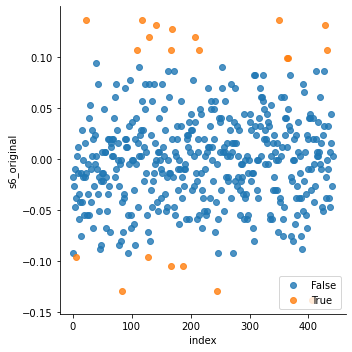

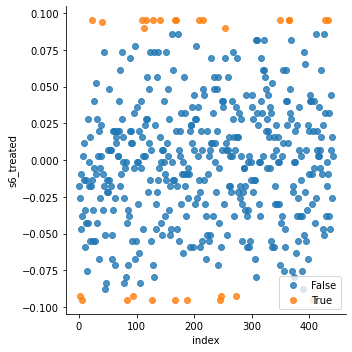

In [7]:
# library
import seaborn as sns

# Create a new data for the plot
temp_data = pd.concat([data.s6, pd.DataFrame(out1(data.s6))],axis=1)
temp_data.columns = ['s6_original', 'out']
temp_data['index'] = temp_data.index

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='index', y='s6_original', data=temp_data, fit_reg=False, hue='out', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right') 
#sns.plt.show()


# Create the same plot using treated values

# Create a new data for the plot
temp_data = pd.concat([data1.s6, pd.DataFrame(out1(data1.s6))],axis=1)
temp_data.columns = ['s6_treated', 'out']
temp_data['index'] = temp_data.index

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='index', y='s6_treated', data=temp_data, fit_reg=False, hue='out', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right') 
#sns.plt.show()



#### Q3 : Create a Correlation matrix and exclude variables with very low correlation with dependent variable

*Use ``DataFrame.corr()`` function *

In [8]:
# Correlation
data1.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.196167,0.339878,0.271870,0.230220,-0.087073,0.212263,0.274635,0.304443,0.188234
bmi,0.196167,1.000000,0.406267,0.264540,0.275848,-0.370106,0.424723,0.467665,0.399081,0.578900
bp,0.339878,0.406267,1.000000,0.254184,0.192813,-0.189005,0.266766,0.399356,0.390097,0.443979
s1,0.271870,0.264540,0.254184,1.000000,0.889449,0.044179,0.536265,0.524781,0.331268,0.219378
s2,0.230220,0.275848,0.192813,0.889449,1.000000,-0.193750,0.660886,0.339720,0.293324,0.183142
s3,-0.087073,-0.370106,-0.189005,0.044179,-0.193750,1.000000,-0.767563,-0.419812,-0.286774,-0.401202
s4,0.212263,0.424723,0.266766,0.536265,0.660886,-0.767563,1.000000,0.625965,0.411602,0.436015
s5,0.274635,0.467665,0.399356,0.524781,0.339720,-0.419812,0.625965,1.000000,0.464016,0.578896
s6,0.304443,0.399081,0.390097,0.331268,0.293324,-0.286774,0.411602,0.464016,1.000000,0.376113
target,0.188234,0.578900,0.443979,0.219378,0.183142,-0.401202,0.436015,0.578896,0.376113,1.000000


In [9]:
# We can remove age and s2 which has low correlation with target variable
data1 = data1.drop(columns = ['age','s2'], axis = 1)

#### Q4 : Check whether the target variable is normally distributed. If not, apply appropriate transformation

Refer to the code in the course material and check using Histogram plot

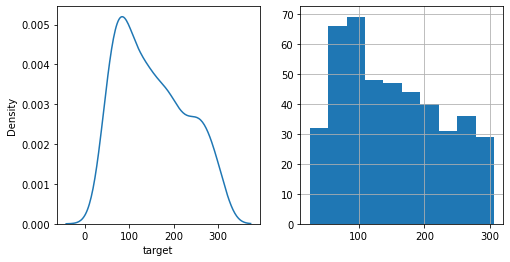

In [10]:
### Normal Distribution check
# Histogram
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.distplot(data1['target'],hist=False)
ax=plt.subplot(1,2,2)
data1['target'].hist()
plt.show()

In [11]:
# Box-cox transformation
import scipy
from scipy import stats

bx = stats.boxcox(data1['target']) #Box Cox transformation

# print the lambda value
print(bx[1])
#store the transformed value in a new variable
YT = bx[0]

0.33843609196124497


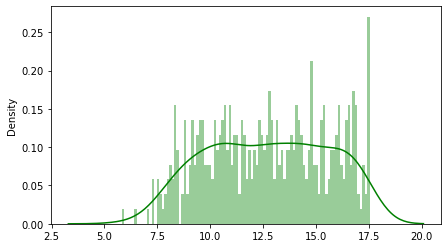

In [12]:
plt.figure(figsize=(7, 4))
sns.distplot(YT, color='g', bins=100, hist_kws={'alpha': 0.4})
warnings.filterwarnings('ignore')

#### Now we can run our first iteration using the transformed dependent variable

##### First , we need to split into train, validation and test.

In [13]:
# Split the data into 3 sets - train, validation and test
# Here the data is cross section , so we can do out of sample validation
# We will split in the ration 72-18-10 %
import sklearn
from sklearn.model_selection import train_test_split

nrow = len(data1)
X_train, X_val = sklearn.model_selection.train_test_split(data1.iloc[:,:-1],test_size=int(nrow*0.1),random_state=1)
X_train, X_test = sklearn.model_selection.train_test_split(X_train,test_size=int(nrow*0.2),random_state=1)

Y_train, Y_val = sklearn.model_selection.train_test_split(YT,test_size=int(nrow*0.1),random_state=1)
Y_train, Y_test = sklearn.model_selection.train_test_split(Y_train,test_size=int(nrow*0.2),random_state=1)

#### Q5 : Write atleast 5 points of the below output interpretation

In [14]:
### Now we will run our first version of model

import statsmodels.api as sm

# OLS regression
est = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(est.summary())

# 5 Interpretations

# 1. The coefficient corresponding to const is the intercept of the regression line, 
#    which indirectly represents the average value of the excluded variables and noise present in model.

# 2. The NULL hypothesis of a regression is "Dependent variable do not depend on that independent variable".

#    The t statistic value should be greater than 2 or less than -2 to reject the null hypothesis but the variables s1,s3,s6 are between -2 and 2.
#    So the NULL hypothesis cannot be rejected for them which indicates that they are insignificant variables.


# 3. Even the P values and confidence intervals of the variables s1,s3 and s6 suggest to reject the null hypothesis for these variables.

# 4. The F-statistic score tells the whether the entire regression line is insignificant or not, instead of considering individual feature. 
#    Prob(F-statistic) is less than 0.05 which suggests to reject the NULL hypothesis.


# 5. The Adjusted R-squared value is less than 0.5 which indicates 
#    that the Regression doesn't work well on the current set of variables which suggests that
#    further data preprocessing or transformations needs to be done on the dataset.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     44.50
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           5.33e-43
Time:                        14:19:15   Log-Likelihood:                -658.43
No. Observations:                 310   AIC:                             1333.
Df Residuals:                     302   BIC:                             1363.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7204      0.118    107.542      0.0

#### Q6 : Check the MAPE of first iteration for both training and validation

Refer the code used in the course material

In [15]:
### Function to return the original data from transformed data

def ori_from_bc(x,lmb):
    return(pow(x*lmb+1,1/lmb))

est = sm.OLS(Y_train, sm.add_constant(X_train)).fit()


# Make predictions using the validation set
Y_pred=est.predict(sm.add_constant(X_val))
Y_pred1=est.predict(sm.add_constant(X_train))

In [16]:
# MAPE - Mean Absolute Percentage Error - It helps to check the error% we have in our prediction

# check MAPE (on the validation set)

def mape1(act,pred):
    act, pred = np.array(act), np.array(pred)
    return np.mean(np.abs((act - pred) / act)) * 100

print("Training MAPE is : " + str(mape1(ori_from_bc(Y_train,0.3384),Y_pred1)) + "%")
print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.3384),Y_pred)) + "%")

Training MAPE is : 89.24581348452256%
Validation MAPE is : 90.26383987306961%


#### 2nd Iteration

#### Q7 : Check VIF for multicollinearity , remove variables with high VIF and again check the MAPE

In [17]:
### VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
print(X_train.columns)
print(vif)

Index(['bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')
[1.6332021272067285, 1.3521574158152658, 5.73508109627361, 8.970089744422841, 11.4226518072152, 2.329062560827313, 1.441535166221635]


In [18]:
### Remove var with high VIF one by one in while loop
X_train2 = X_train
while (max(vif) > 5):    
    indx = vif.index(max(vif)) #Get the index of variable with highest VIF
    X_train2 = X_train2.drop(X_train2.columns[indx],axis = 1)#Drop variable if the highest VIF is greater than 5
    vif = [variance_inflation_factor(X_train2.values, i)
                          for i in range(len(X_train2.columns))] #Run VIF again

In [19]:
# Check Mape
X_val2 = X_val[X_train2.columns]

# Train the model using the training sets
est = sm.OLS(Y_train, sm.add_constant(X_train2)).fit()

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_val2)),0.3384)
Y_pred1 = ori_from_bc(est.predict(),0.3384)

print("Training MAPE is : " + str(mape1(ori_from_bc(Y_train,0.3384),Y_pred1)) + "%")
print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.3384),Y_pred)) + "%")

Training MAPE is : 36.01500490239039%
Validation MAPE is : 31.49694173093738%


#### Q8 : Improve the Model accuracy
#### Run a Significance Check
#### Remove influential observation

In [20]:
# OLS regression
est = sm.OLS(Y_train, sm.add_constant(X_train2)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     52.04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           7.68e-44
Time:                        14:19:15   Log-Likelihood:                -658.52
No. Observations:                 310   AIC:                             1331.
Df Residuals:                     303   BIC:                             1357.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7124      0.117    109.116      0.0

##### Influential observation using Cook's Distance 
You can set the cutoff using formula 4/(n-k-1) or manually increase/decrease cutoff value to improve accuracy.

In [21]:
inf=est.get_influence()
cd = inf.cooks_distance
cd = list(cd[0])
len(cd)

310

In [22]:
# Cook's Distance

inf = est.get_influence()
cd = inf.cooks_distance
cd = list(cd[0])
inf_cutoff = 4/(len(cd)-6-1)#4/(n-k-1)
#inf_cutoff = "Enter the cutoff value here" # You can run iteration by manually setting the cutoff value

out = [1 if x > inf_cutoff else 0 for x in cd]
sum(out)

10

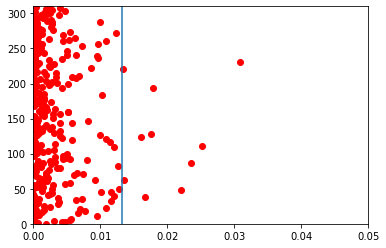

In [23]:
### get index of non outliers
cook_index = np.where(np.array(out)==0)[0]

plt.plot(cd, range(0,len(cd)), 'ro')
plt.axis([0, 0.05, 0, len(cd)])
plt.plot(np.repeat(inf_cutoff,len(cd)), range(0,len(cd)), '-')

In [24]:
# Check Mape

# Train the model using the training sets
est = sm.OLS(Y_train[cook_index], sm.add_constant(X_train2.iloc[cook_index,:])).fit()

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_val2)),0.3384)
Y_pred1 = ori_from_bc(est.predict(),0.3384)

print("Training MAPE is : " + str(mape1(ori_from_bc(Y_train[cook_index],0.3384),Y_pred1)) + "%")
print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.3384),Y_pred)) + "%")

Training MAPE is : 32.6256940068597%
Validation MAPE is : 31.768146344718385%


In [25]:
# check test accuracy
X_test2 = X_test[X_train2.columns]
# Train the model using the training sets
est = sm.OLS(Y_train[cook_index], sm.add_constant(X_train2.iloc[cook_index,:])).fit()

# Make predictions using the validation set
Y_pred = ori_from_bc(est.predict(sm.add_constant(X_test2)),0.3384)

print("Test MAPE is : " + str(mape1(ori_from_bc(Y_test,0.3384),Y_pred)) + "%")

Test MAPE is : 42.18325499698871%


In [26]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     64.89
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           5.93e-51
Time:                        14:19:15   Log-Likelihood:                -612.89
No. Observations:                 300   AIC:                             1240.
Df Residuals:                     293   BIC:                             1266.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8030      0.109    117.156      0.0

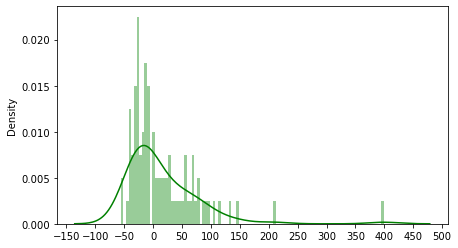

In [27]:
# We can check the error distribution 

import matplotlib.ticker as ticker
err = (Y_pred - ori_from_bc(Y_test,0.3384))/ori_from_bc(Y_test,0.3384)*100

# Error distribution using histogram
plt.figure(figsize=(7, 4))
ax = sns.distplot(err, color='g', bins=100, hist_kws={'alpha': 0.4},hist=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()

#### Q9 : Calculate how much percentage of test data are in error range of -30% to +30%

In [28]:
(len(err[(err>-30)&(err<30)])/len(err))*100

54.54545454545454

#### Q10 : Improve the model accuracy (test and validation)

 - Exclude insignificant variables
 - Residual outlier treatment
 - variable transformation of independent variables

In [29]:
df_train=X_train2
df_val=X_val2
df_test=X_test2
df_train=df_train.drop(['s6'],axis=1)

In [30]:
# df_train = df_train.apply(out_impute)

In [31]:
# while (max(vif) > 5):    
#     indx = vif.index(max(vif)) #Get the index of variable with highest VIF
#     df_train = df_train.drop(df_train.columns[indx],axis = 1)#Drop variable if the highest VIF is greater than 5
#     vif = [variance_inflation_factor(df_train.values, i)
#                           for i in range(len(df_train.columns))] 

In [32]:
est = sm.OLS(Y_train, sm.add_constant(df_train)).fit()

inf = est.get_influence()
cd = inf.cooks_distance
cd = list(cd[0])
inf_cutoff = 4/(len(cd)-5-1)#4/(n-k-1)
#inf_cutoff = "Enter the cutoff value here" # You can run iteration by manually setting the cutoff value

out = [1 if x > inf_cutoff else 0 for x in cd]
sum(out)

13

In [33]:
est = sm.OLS(Y_train[cook_index], sm.add_constant(df_train.iloc[cook_index,:])).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     78.09
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           6.67e-52
Time:                        14:19:15   Log-Likelihood:                -612.94
No. Observations:                 300   AIC:                             1238.
Df Residuals:                     294   BIC:                             1260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8041      0.109    117.403      0.000      12.589      13.019
bmi           21.6513      2.960      7.314      0.000      15.825      27.477
bp             7.0214      2.732      2.570      0.011       1.644      12.399
s1            -7.2655      3.201     -2.270      0.024     -13.565      -0.967
s3            -6.4359      3.094     -2.080      0.038     -12.526      -0.346
s5            27.2583      3.686      7.395      0.000      20.004      34.513
==============================================================================
Omnibus:                       10.561   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                5.215
Skew:                          -0.023   Prob(JB):                       0.0737
Kurtosis:                       2.356   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df_val=df_val.drop(['s6'],axis=1)
df_test=df_test.drop(['s6'],axis=1)

In [35]:
df_train.describe()

,bmi,bp,s1,s3,s5
count,310.000000,310.000000,310.000000,310.000000,310.000000
mean,-0.001564,-0.000353,-0.000229,-0.000214,-0.000518
std,0.046633,0.045953,0.045735,0.044349,0.045371
min,-0.089197,-0.095130,-0.095130,-0.095130,-0.095130
25%,-0.038271,-0.036656,-0.034248,-0.032356,-0.033249
50%,-0.007284,-0.005671,-0.004321,-0.006584,-0.004683
75%,0.030440,0.032201,0.031110,0.030232,0.032894
max,0.095130,0.095130,0.095130,0.095130,0.095130


In [36]:
# Make predictions using the validation set
Y_pred_val = ori_from_bc(est.predict(sm.add_constant(df_val)),0.3384)

print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.3384),Y_pred_val)) + "%")

Y_pred_test = ori_from_bc(est.predict(sm.add_constant(df_test)),0.3384)

print("Test MAPE is : " + str(mape1(ori_from_bc(Y_test,0.3384),Y_pred_test)) + "%")

Validation MAPE is : 31.86153009041588%
Test MAPE is : 42.15022127039125%


array([[<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'bp'}>],
       [<AxesSubplot:title={'center':'s1'}>,
        <AxesSubplot:title={'center':'s3'}>],
       [<AxesSubplot:title={'center':'s5'}>, <AxesSubplot:>]],
      dtype=object)

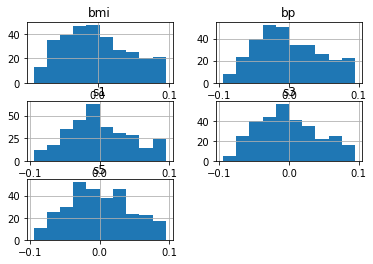

In [37]:
df_train.hist()

In [38]:
# Applying Yeo Johnson transformation to the df_train dataset
#from sklearn.preprocessing import power_transform
#df_train['bmi']=power_transform(df_train['bmi'], method='yeo-johnson')

In [39]:
XT=stats.yeojohnson(df_train['s1'])
df_train['s1']=XT[0]

XT=stats.yeojohnson(df_train['s3'])
df_train['s3']=XT[0]

In [40]:
est = sm.OLS(Y_train[cook_index], sm.add_constant(df_train.iloc[cook_index,:])).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     78.14
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           6.28e-52
Time:                        14:19:16   Log-Likelihood:                -612.88
No. Observations:                 300   AIC:                             1238.
Df Residuals:                     294   BIC:                             1260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7632      0.110    116.362      0.000      12.547      12.979
bmi           21.6638      2.961      7.317      0.000      15.837      27.491
bp             7.0501      2.732      2.580      0.010       1.673      12.428
s1            -7.1414      3.225     -2.214      0.028     -13.488      -0.794
s3            -6.7297      3.159     -2.130      0.034     -12.947      -0.512
s5            27.0137      3.688      7.324      0.000      19.755      34.273
==============================================================================
Omnibus:                       10.937   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                5.319
Skew:                          -0.015   Prob(JB):                       0.0700
Kurtosis:                       2.348   Cond. No.                         44.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
Y_pred_val = ori_from_bc(est.predict(sm.add_constant(df_val)),0.3384)

print("Validation MAPE is : " + str(mape1(ori_from_bc(Y_val,0.3384),Y_pred_val)) + "%")

Y_pred_test = ori_from_bc(est.predict(sm.add_constant(df_test)),0.3384)

print("Test MAPE is : " + str(mape1(ori_from_bc(Y_test,0.3384),Y_pred_test)) + "%")

Validation MAPE is : 31.62191816270986%
Test MAPE is : 41.89582290154288%


array([[<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'bp'}>],
       [<AxesSubplot:title={'center':'s1'}>,
        <AxesSubplot:title={'center':'s3'}>],
       [<AxesSubplot:title={'center':'s5'}>, <AxesSubplot:>]],
      dtype=object)

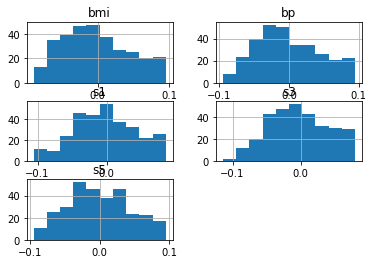

In [42]:
df_train.hist()